# Segmentación con skimage<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [1]:
from pylab import *

In [2]:
from skimage.color import rgb2gray

In [3]:
A = imread('img/4.jpg')

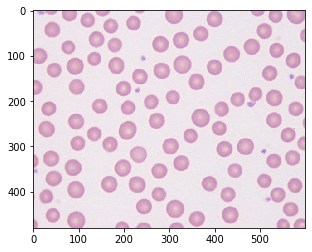

In [4]:
imshow(A)
show()

In [5]:
A.shape

(480, 600, 3)

In [6]:
rcParams['image.cmap'] = 'gray'

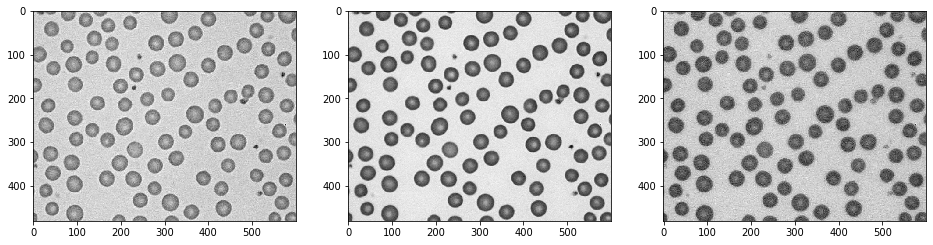

In [7]:
_, (ax1, ax2, ax3) = subplots(1, 3, figsize=(16,4))

ax1.imshow(A[:,:,0])
ax2.imshow(A[:,:,1])
ax3.imshow(A[:,:,2])

show()

In [8]:
from skimage.filters import gaussian

In [9]:
img = gaussian(A[:, :, 1])

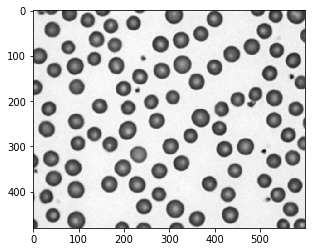

In [10]:
imshow(img)
show()

In [11]:
from skimage.filters import sobel, threshold_otsu

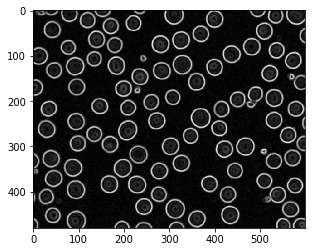

In [12]:
img_bound = sobel(img)

imshow(img_bound)
show()

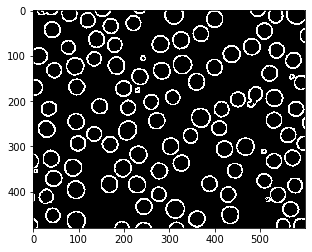

In [13]:
img_bin = img_bound > threshold_otsu(img_bound)

imshow(img_bin)
show()

In [14]:
import scipy.ndimage as ndi

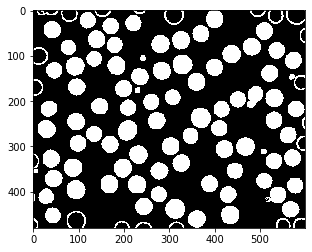

In [15]:
img_fill = ndi.binary_fill_holes(img_bin)

imshow(img_fill)

show()

Remover objetos pequeños y limpiar la imagen

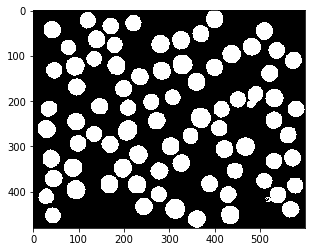

In [16]:
label_objects, nb_labels = ndi.label(img_fill)
sizes = bincount(label_objects.ravel())
mask_sizes = sizes > 400
mask_sizes[0] = 0
img_clean = mask_sizes[label_objects]

imshow(img_clean)

show()

In [17]:
from skimage.filters import gaussian

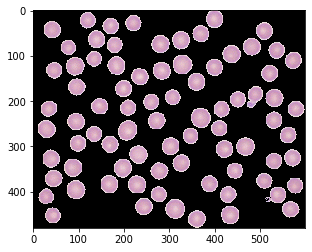

In [18]:
B = zeros_like(A)

B[:,:, 0] = A[:, :, 0] * img_clean
B[:,:, 1] = A[:, :, 1] * img_clean
B[:,:, 2] = A[:, :, 2] * img_clean

imshow(B)
show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).